In [19]:
%pip install yfinance matplotlib pandas


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf

gold_ticker = "GC=F"
sp500_ticker = "^GSPC"

gold_data = yf.download(gold_ticker, start="2008-01-01",end="2009-06-30", interval="1d")
sp500_data = yf.download(sp500_ticker, start="2008-01-01",end="2009-06-30", interval="1d")

/var/folders/g3/sxyl_n7x6d51bbb320nhxx5c0000gn/T/ipykernel_48913/456433553.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data = yf.download(gold_ticker, start="2008-01-01",end="2009-06-30", interval="1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/g3/sxyl_n7x6d51bbb320nhxx5c0000gn/T/ipykernel_48913/456433553.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(sp500_ticker, start="2008-01-01",end="2009-06-30", interval="1d")

/var/folders/g3/sxyl_n7x6d51bbb320nhxx5c0000gn/T/ipykernel_48913/456433553.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(sp500_ticker, start="2008-01-01",end="2009-06-30", interval="1d")
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
gold_data.columns = gold_data.columns.droplevel(1)
print(gold_data.head())
sp500_data.columns = sp500_data.columns.droplevel(1)
print(sp500_data.head())

Price            Close        High         Low        Open  Volume
Date                                                              
2008-01-02  857.000000  857.799988  846.400024  848.700012     130
2008-01-03  866.400024  865.500000  856.299988  863.000000     181
2008-01-04  863.099976  865.500000  860.200012  861.400024      28
2008-01-07  859.599976  860.900024  857.400024  860.900024       4
2008-01-08  878.000000  879.400024  861.599976  861.599976      21
Price             Close         High          Low         Open      Volume
Date                                                                      
2008-01-02  1447.160034  1471.770020  1442.069946  1467.969971  3452650000
2008-01-03  1447.160034  1456.800049  1443.729980  1447.550049  3429500000
2008-01-04  1411.630005  1444.010010  1411.189941  1444.010010  4166000000
2008-01-07  1416.180054  1423.869995  1403.449951  1414.069946  4221260000
2008-01-08  1390.189941  1430.280029  1388.300049  1415.709961  4705390000


In [22]:
start_date = None
if gold_data.index.min() > sp500_data.index.min():
    start_date = gold_data.index.min()
    sp500_data = sp500_data[sp500_data.index >= start_date]
else:
    start_date = sp500_data.index.min()
    gold_data = gold_data[gold_data.index >= start_date]
print(gold_data.head())
print(sp500_data.head())


Price            Close        High         Low        Open  Volume
Date                                                              
2008-01-02  857.000000  857.799988  846.400024  848.700012     130
2008-01-03  866.400024  865.500000  856.299988  863.000000     181
2008-01-04  863.099976  865.500000  860.200012  861.400024      28
2008-01-07  859.599976  860.900024  857.400024  860.900024       4
2008-01-08  878.000000  879.400024  861.599976  861.599976      21
Price             Close         High          Low         Open      Volume
Date                                                                      
2008-01-02  1447.160034  1471.770020  1442.069946  1467.969971  3452650000
2008-01-03  1447.160034  1456.800049  1443.729980  1447.550049  3429500000
2008-01-04  1411.630005  1444.010010  1411.189941  1444.010010  4166000000
2008-01-07  1416.180054  1423.869995  1403.449951  1414.069946  4221260000
2008-01-08  1390.189941  1430.280029  1388.300049  1415.709961  4705390000


In [23]:
corr_data = gold_data.corrwith(sp500_data, axis=0)
print(corr_data)

Price
Close     0.132272
High      0.105326
Low       0.161963
Open      0.128245
Volume   -0.031838
dtype: float64


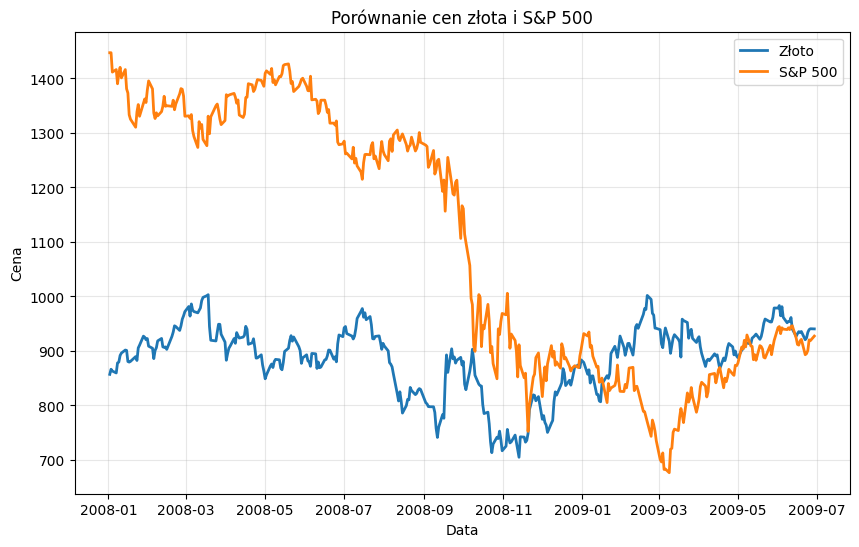

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gold_data.index, gold_data['Close'], label='Złoto', linewidth=2)
plt.plot(sp500_data.index, sp500_data['Close'], label='S&P 500', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Cena')
plt.title('Porównanie cen złota i S&P 500')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()